# Visualisation and Representation of data


In [12]:
import matplotlib.pyplot as plt 
import pandas as pd
import os


In [30]:
# Lire les premières lignes du fichier pour inspecter sa structure
file_path = '/Users/mac/Desktop/Datos/analisis_datos/Grupo_3/data/curva_pbc_uof_20240201.1'
df = pd.read_csv(file_path, encoding='latin1', sep=';', skiprows=2)
df

,Hora,Fecha,Pais,Unidad,Tipo Oferta,Energía Compra/Venta,Precio Compra/Venta,Ofertada (O)/Casada (C),Unnamed: 8
0,1.0,01/02/2024,MI,TOTRM01,C,"496,0","1.500,00",O,NaN
1,1.0,01/02/2024,MI,TOTRM02,C,"138,0","1.500,00",O,NaN
2,1.0,01/02/2024,MI,TOTRM03,C,"56,0","1.500,00",O,NaN
3,1.0,01/02/2024,MI,BPRM01,C,"31,4","1.002,00",O,NaN
4,1.0,01/02/2024,MI,EUCDR01,C,"9,3","1.002,00",O,NaN
5,1.0,01/02/2024,MI,ZELTC01,C,"0,2","800,00",O,NaN
6,1.0,01/02/2024,MI,HCGCOX,C,"2,7","701,00",O,NaN
7,1.0,01/02/2024,MI,STROC01,C,"0,1","700,05",O,NaN
8,1.0,01/02/2024,MI,ACCGC02,C,"35,2","551,00",O,NaN
9,1.0,01/02/2024,MI,ALDRC02,C,"31,0","501,00",O,NaN


   Hora       Fecha Pais   Unidad Tipo Oferta Energía Compra/Venta  \
0   1.0  01/02/2024   MI  TOTRM01           C                496,0   
1   1.0  01/02/2024   MI  TOTRM02           C                138,0   
2   1.0  01/02/2024   MI  TOTRM03           C                 56,0   
3   1.0  01/02/2024   MI   BPRM01           C                 31,4   
4   1.0  01/02/2024   MI  EUCDR01           C                  9,3   

  Precio Compra/Venta Ofertada (O)/Casada (C)  
0            1.500,00                       O  
1            1.500,00                       O  
2            1.500,00                       O  
3            1.002,00                       O  
4            1.002,00                       O  
Hora                       float64
Fecha                       object
Pais                        object
Unidad                      object
Tipo Oferta                 object
Energía Compra/Venta        object
Precio Compra/Venta         object
Ofertada (O)/Casada (C)     object
dtype: obje

In [31]:
df['Energía Compra/Venta'] = df['Energía Compra/Venta'].str.replace('.', '', regex=False)
df['Precio Compra/Venta'] = df['Precio Compra/Venta'].str.replace('.', '', regex=False)

# Remplacer les virgules par des points dans les colonnes numériques
df['Energía Compra/Venta'] = df['Energía Compra/Venta'].str.replace(',', '.', regex=False).astype(float)
df['Precio Compra/Venta'] = df['Precio Compra/Venta'].str.replace(',', '.', regex=False).astype(float)

# Supprimer la colonne non nécessaire 'Unnamed: 8'
df.drop(columns=['Unnamed: 8'], inplace=True)

print(df.head())
print(df.dtypes)

   Hora       Fecha Pais   Unidad Tipo Oferta  Energía Compra/Venta  \
0   1.0  01/02/2024   MI  TOTRM01           C                 496.0   
1   1.0  01/02/2024   MI  TOTRM02           C                 138.0   
2   1.0  01/02/2024   MI  TOTRM03           C                  56.0   
3   1.0  01/02/2024   MI   BPRM01           C                  31.4   
4   1.0  01/02/2024   MI  EUCDR01           C                   9.3   

   Precio Compra/Venta Ofertada (O)/Casada (C)  
0               1500.0                       O  
1               1500.0                       O  
2               1500.0                       O  
3               1002.0                       O  
4               1002.0                       O  
Hora                       float64
Fecha                       object
Pais                        object
Unidad                      object
Tipo Oferta                 object
Energía Compra/Venta       float64
Precio Compra/Venta        float64
Ofertada (O)/Casada (C)     object

/Users/mac/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/mac/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


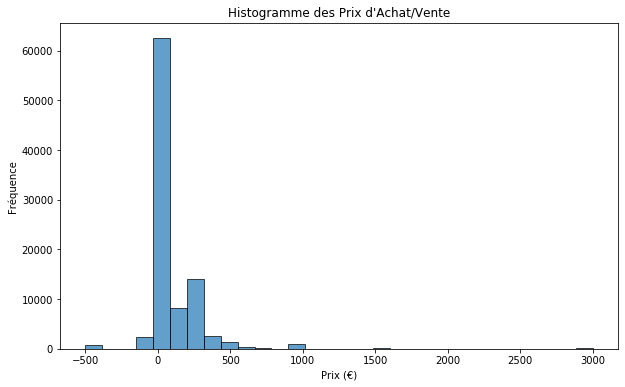

In [32]:
plt.figure(figsize=(10, 6))
plt.hist(df['Precio Compra/Venta'], bins=30, edgecolor='k', alpha=0.7)
plt.title("Histogramme des Prix d'Achat/Vente")
plt.xlabel('Prix (€)')
plt.ylabel('Fréquence')
plt.show()

/Users/mac/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


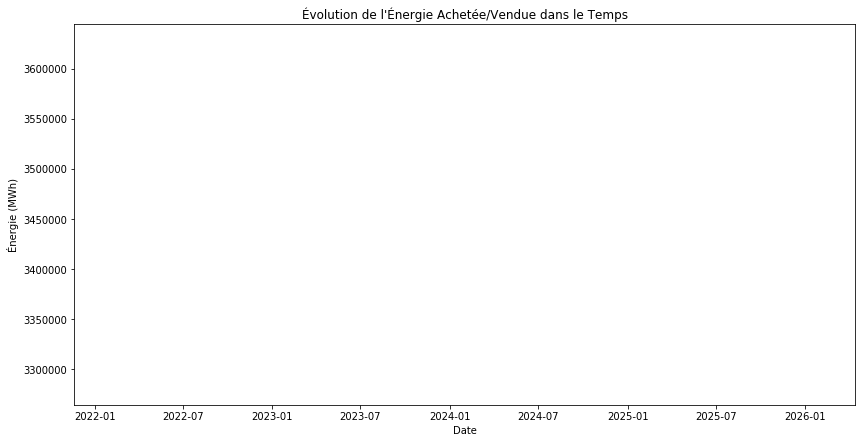

In [33]:
# Convertir la colonne 'Fecha' en datetime
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%d/%m/%Y')

# Agréger les données par date et somme de l'énergie
energy_per_date = df.groupby('Fecha')['Energía Compra/Venta'].sum()

plt.figure(figsize=(14, 7))
plt.plot(energy_per_date.index, energy_per_date.values)
plt.title("Évolution de l'Énergie Achetée/Vendue dans le Temps")
plt.xlabel('Date')
plt.ylabel('Énergie (MWh)')
plt.show()

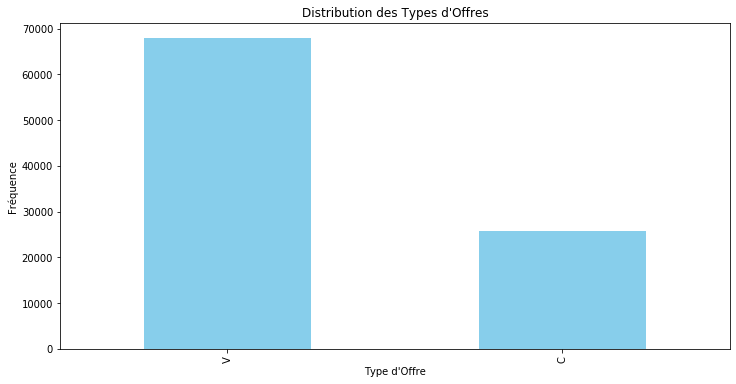

In [34]:
plt.figure(figsize=(12, 6))
df['Tipo Oferta'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Distribution des Types d'Offres")
plt.xlabel('Type d\'Offre')
plt.ylabel('Fréquence')
plt.show()

In [ ]:
# Courbe agrée Demande et offre 